In [204]:
import pandas as pd
import os
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sb
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
sb.set(rc={"figure.figsize": (8, 6)})

## VISUALIZATIONS AND ANALYSIS ##

In [205]:
df = pd.read_csv("../data/Luxury_Fashion.csv")
df

,Brand,BrandOriginCountry,BrandOriginRegion,Rank2017,Rank2018,Rank2019,Rank2020,Rank2021,Equity2017,Equity2018,...,WebVisibility2023,Sentiment2023,Growth2023,Search2023,Rank2023,Mcap2023billions,pub_priv,MFW2023,PFW2023,NYFW2023
0,Hermes,France,Europe,32.0,32.0,28.0,28.0,23.0,14210.0,16372.0,...,67.57,100.00,100.00,87.88,373.85,130.4,Public,no,yes,no
1,Gucci,Italy,Europe,51.0,39.0,33.0,32.0,33.0,9969.0,12942.0,...,100.00,53.61,23.56,85.14,362.31,unknown,NaN,yes,no,yes
2,Louis Vuitton,France,Europe,19.0,18.0,17.0,17.0,13.0,22919.0,28152.0,...,50.61,51.18,13.68,100.00,250.64,unknown,NaN,no,yes,yes
3,Chanel,France,Europe,NaN,23.0,22.0,21.0,22.0,NaN,20005.0,...,90.20,48.21,2.68,30.78,243.13,57.46,Private,no,yes,yes
4,Coach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.64,64.26,0.00,41.18,171.37,unknown,NaN,no,no,yes
5,Prada,Italy,Europe,94.0,95.0,100.0,99.0,94.0,4716.0,4812.0,...,34.19,38.19,56.09,16.69,166.68,12.0,Public,yes,no,yes
6,Fendi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.63,58.47,65.87,16.09,165.80,unknown,NaN,yes,no,yes
7,Dior,France,Europe,95.0,91.0,82.0,83.0,77.0,4587.0,5223.0,...,56.86,37.65,1.58,18.14,159.24,unknown,NaN,no,yes,no
8,Calvin Klein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.25,62.08,8.06,50.99,157.13,unknown,NaN,no,no,no
9,Ted Baker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.51,47.14,48.81,34.81,139.14,unknown,Public,no,no,no


1. Top 5 brands in 2023.

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_7959/1989377546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = top_5_brands["Brand"], y = top_5_brands["Rank2023"], palette="BrBG").set(title='5 Top ranked Brands 2023')


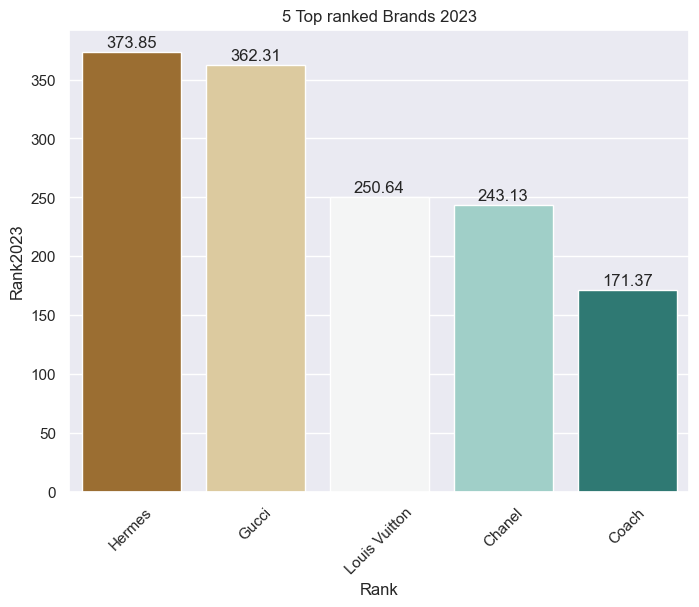

In [206]:
top_5_brands = df.sort_values(by="Rank2023", ascending=False).head(5)
sb.barplot(x = top_5_brands["Brand"], y = top_5_brands["Rank2023"], palette="BrBG").set(title='5 Top ranked Brands 2023')
sb.set(font_scale=1.0)
plt.xticks(rotation=45)
plt.xlabel('Rank')
for index, row in top_5_brands.iterrows():
   plt.text(index, row["Rank2023"] + 4, str(row["Rank2023"]), ha='center')
plt.savefig(f"../figures/rank_5.png", bbox_inches = "tight")
plt.show()

    ''' Why is Dior not in here? And Prada? What's going on? What's happenin'? '''
    
    Let's see the Top 10

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_7959/1572252353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = top_10_brands["Brand"], y = top_10_brands["Rank2023"], palette="BrBG").set(title='10 Top ranked Brands 2023')


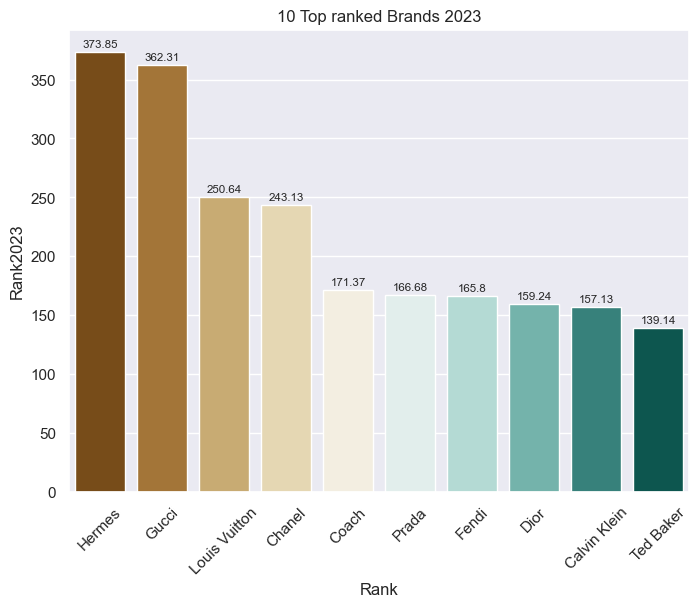

In [207]:
top_10_brands = df.sort_values(by="Rank2023", ascending=False).head(10)
sb.barplot(x = top_10_brands["Brand"], y = top_10_brands["Rank2023"], palette="BrBG").set(title='10 Top ranked Brands 2023')
sb.set(font_scale=0.7)
plt.xticks(rotation=45)
plt.xlabel('Rank')
for index, row in top_10_brands.iterrows():
   plt.text(index, row["Rank2023"] + 4, str(row["Rank2023"]), ha='center')
plt.savefig(f"../figures/rank_10.png", bbox_inches = "tight")
plt.show()

2. Why are they organized like in stairs? Does it have to do with the sentiment?

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_7959/183810749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = top_10_brands["Brand"], y = top_10_brands["Sentiment2023"], palette="bone").set(title='Sentiment Top 10 Brands')


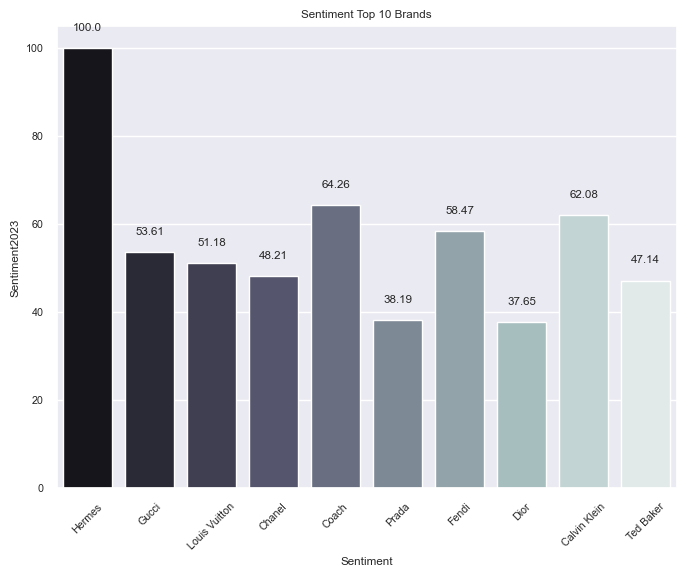

In [208]:
top_10_brands = df.sort_values(by="Rank2023", ascending=False).head(10)
sb.barplot(x = top_10_brands["Brand"], y = top_10_brands["Sentiment2023"], palette="bone").set(title='Sentiment Top 10 Brands')
sb.set(font_scale=0.7)
plt.xticks(rotation=45)
plt.xlabel('Sentiment')
for index, row in top_10_brands.iterrows():
   plt.text(index, row["Sentiment2023"] + 4, str(row["Sentiment2023"]), ha='center')
plt.savefig(f"../figures/sentiment_10.png", bbox_inches = "tight")
plt.show()

    ''' Apparently the only one that would make sense is Hermes, the rest of them doesn't seem to be that influenced by the Sentiment. '''

    Maybe it has to do with visibility either on the web or runways.

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_7959/2662185805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = top_10_brands["Brand"], y = top_10_brands["WebVisibility2023"], palette="copper").set(title='Web Visibility Top 10 Brands')


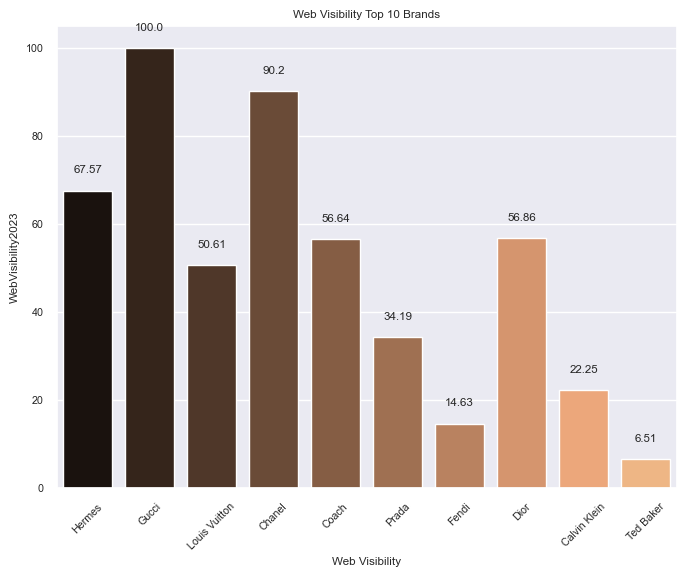

In [209]:
top_10_brands = df.sort_values(by="Rank2023", ascending=False).head(10)
sb.barplot(x = top_10_brands["Brand"], y = top_10_brands["WebVisibility2023"], palette="copper").set(title='Web Visibility Top 10 Brands')
sb.set(font_scale=0.7)
plt.xticks(rotation=45)
plt.xlabel('Web Visibility')
for index, row in top_10_brands.iterrows():
   plt.text(index, row["WebVisibility2023"] + 4, str(row["WebVisibility2023"]), ha='center')
plt.savefig(f"../figures/web_visibility_10.png", bbox_inches = "tight")
plt.show()

In [210]:
visibility = top_10_brands[(top_10_brands["MFW2023"] == "yes") | (top_10_brands["PFW2023"] == "yes") | (top_10_brands["NYFW2023"] == "yes")]


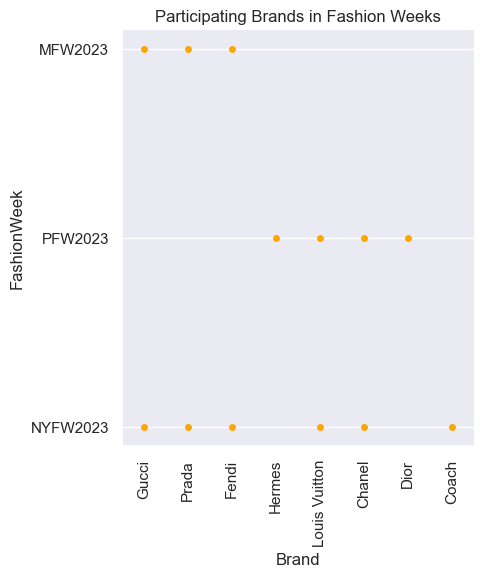

In [211]:
sb.set(rc={"figure.figsize": (8, 6)})
vis =visibility.melt(id_vars='Brand', var_name='FashionWeek', value_name='Participation')
participating_brands = vis[vis['Participation'] == 'yes']
sb.catplot(data=participating_brands, x="Brand", y="FashionWeek", kind="swarm", color="orange").set(title="Participating Brands in Fashion Weeks")
sb.set(font_scale=1.2)
plt.xticks(rotation=90)
plt.savefig(f"../figures/runway_10.png", bbox_inches = "tight")
plt.show()

    ''' A we can see from the plots, It may have something to do with a mix of the visibility and the Sentiment. For example, Hermes is the most liked brand, and because of that he does'nt need the visibility to be that high. So web visibility is 60 and they only went to Paris Fashion Week. '''


    ''' But Luis Vuitton as his Sentiment is not that high, they tried to compensate by going to 2 Fashion Weeks as a strategy to augment visibility and thus the sentimen.'''

3. Has it always been like this?

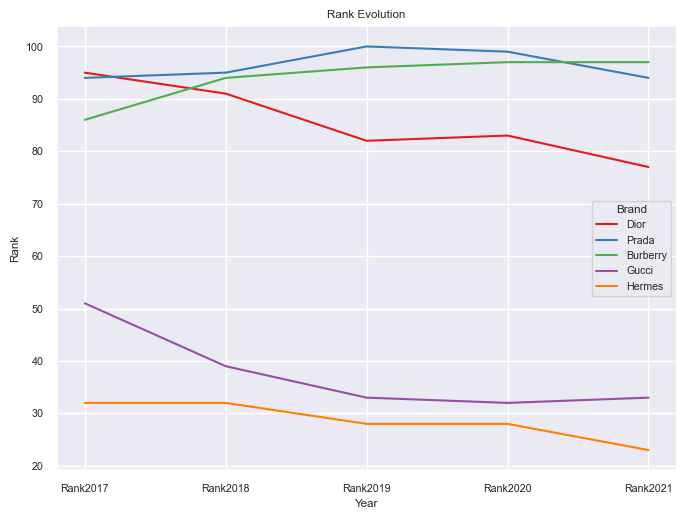

In [222]:
top_5_2017 = df.sort_values(by='Rank2017', ascending=False).head(5)
x_values = top_5_2017[["Rank2017", "Rank2018", "Rank2019", "Rank2020", "Rank2021"]]
df_long = pd.melt(top_5_2017, id_vars='Brand', var_name='Year', value_name='Rank', value_vars=x_values)
sb.lineplot(data=df_long, x='Year', hue='Brand', y='Rank', palette='Set1').set(title='Rank Evolution')
plt.subplots_adjust(top=0.85)
sb.set(font_scale=0.7)
plt.savefig(f"../figures/top_2017.png", bbox_inches = "tight")
plt.show()

    ''' As we can see in the plot in the previous years the ranks were quite different. For starters, Hermes was thelower one from the top 5. We can also see the start of the decadency of Dior, from that graphic we could predict the position in the rank he's in 2023 '''

4. Does the equity get affected by the rank?

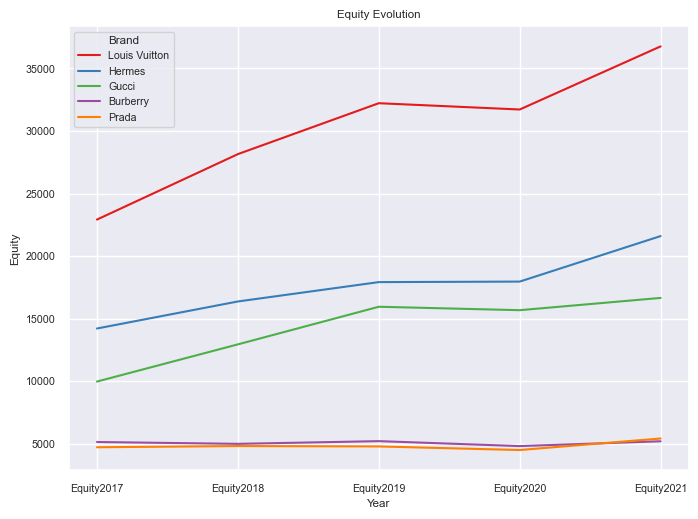

In [220]:
eq_2017 = df.sort_values(by='Equity2017', ascending=False).head(5)
x_values = eq_2017[["Equity2017", "Equity2018", "Equity2019", "Equity2020", "Equity2021"]]
df_long = pd.melt(eq_2017, id_vars='Brand', var_name='Year', value_name='Equity', value_vars=x_values)
sb.lineplot(data=df_long, x='Year', hue='Brand', y='Equity', palette='Set1').set(title='Equity Evolution')
plt.subplots_adjust(top=0.85)
sb.set(font_scale=0.7)
plt.savefig(f"../figures/eq_2017.png", bbox_inches = "tight")
plt.show()

    ''' We can see that obviously Equity doesn't get affected by rank. Maybe it has something to do with the way the company workaraounds is built. But what we can assume for sure is that there are some companies more rentable than others as they are less depending on the rank or the sentiment. For example Luis Vuitton. It's not even in the top 5 rank from 2017 to 2021 an it's the one with more equity. '''

5. Do the lower ranked brands try to gain visibility and position by participating in runways?

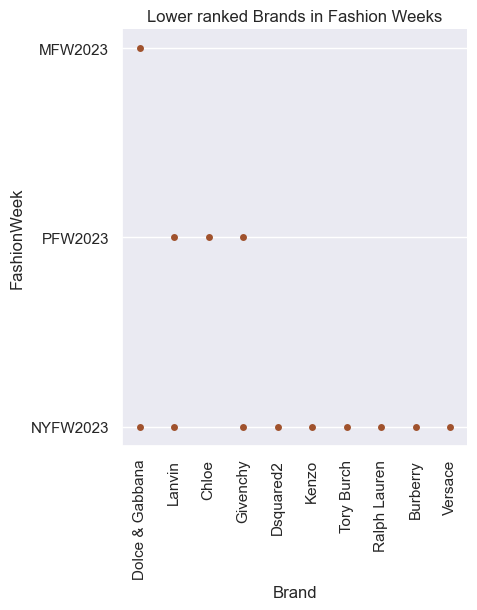

In [232]:
sb.set(rc={"figure.figsize": (8, 6)})
eq_2017 = df.sort_values(by='Rank2023', ascending=True).head(17)
vis =eq_2017.melt(id_vars='Brand', var_name='FashionWeek', value_name='Participation')
participating_brands = vis[vis['Participation'] == 'yes']
sb.catplot(data=participating_brands, x="Brand", y="FashionWeek", kind="swarm", color="sienna").set(title="Lower ranked Brands in Fashion Weeks")
sb.set(font_scale=1.2)
plt.xticks(rotation=90)
plt.savefig(f"../figures/runway_10_tail.png", bbox_inches = "tight")
plt.show()

    ''' We can see that all of them participate in at least 1 show. But only a few participate in more than one. That could be because of many factors, maybe they can't access to the big runaways shows, although what makes more sense is that they just don't participates. As in all Fashion weeks, those luxury brands have already a presaved spot. '''